In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sales = pd.read_csv('product_sales.csv')

In [ ]:
print(sales.shape)

(15000, 8)


In [ ]:
print(sales.isnull().sum())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [ ]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [ ]:
print(sales.describe())

               week       nb_sold       revenue  years_as_customer  \
count  15000.000000  15000.000000  13926.000000       15000.000000   
mean       3.098267     10.084667     93.934943           4.965933   
std        1.656420      1.812213     47.435312           5.044952   
min        1.000000      7.000000     32.540000           0.000000   
25%        2.000000      9.000000     52.470000           1.000000   
50%        3.000000     10.000000     89.500000           3.000000   
75%        5.000000     11.000000    107.327500           7.000000   
max        6.000000     16.000000    238.320000          63.000000   

       nb_site_visits  
count    15000.000000  
mean        24.990867  
std          3.500914  
min         12.000000  
25%         23.000000  
50%         25.000000  
75%         27.000000  
max         41.000000  


count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64


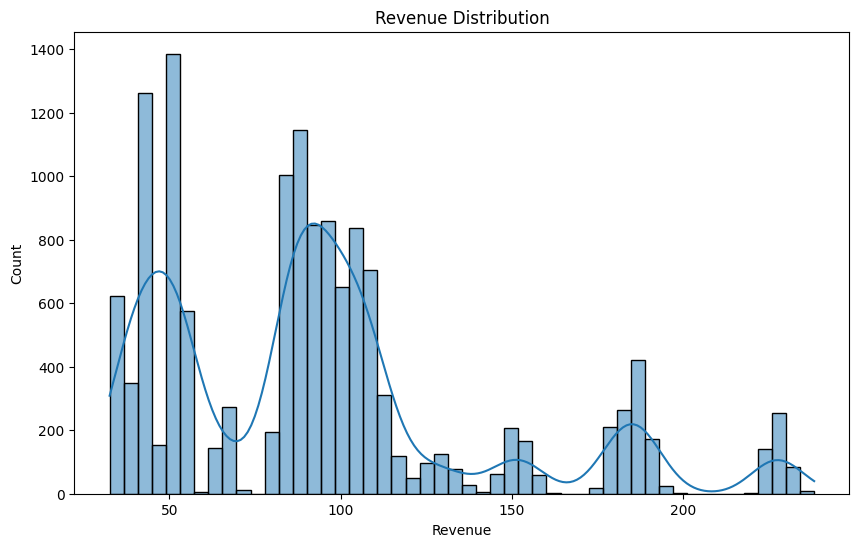

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(sales['revenue'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(sales['revenue'], bins=50, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

In [ ]:
sales['revenue'] = sales['revenue'].fillna(sales['revenue'].mean())
print(sales['revenue'].describe())

count    15000.000000
mean        93.934943
std         45.705474
min         32.540000
25%         53.040000
50%         91.865000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64


In [ ]:
outliers = sales[sales['years_as_customer'] > 41]
outliers

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [ ]:
sales.loc[sales['years_as_customer'] >41, 'years_as_customer'] = 41

In [ ]:
sales['years_as_customer'].describe()

,years_as_customer
count,15000.000000
mean,4.964067
std,5.028153
min,0.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,41.000000


In [ ]:
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [ ]:
sales['sales_method'] = sales['sales_method'].replace('em + call', 'Email + Call')

In [ ]:
sales['sales_method'] = sales['sales_method'].replace('email', 'Email')

In [ ]:
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [ ]:
sales['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [ ]:
sales.to_csv('cleaned_product_sales.csv', index=False)
from google.colab import files
files.download('cleaned_product_sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

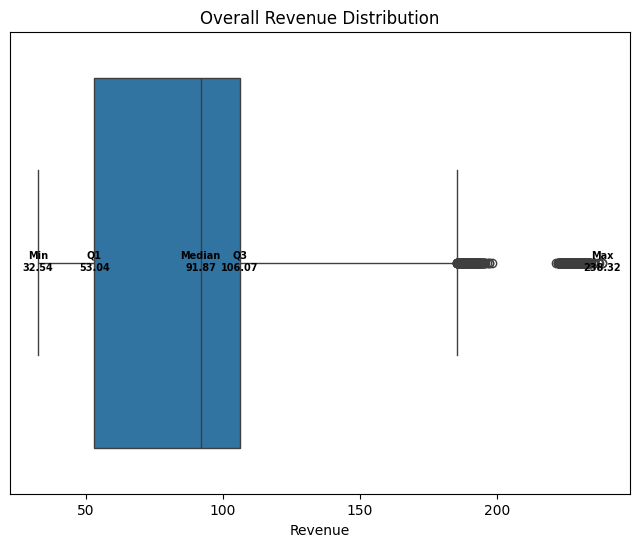

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=sales['revenue'])

desc = sales['revenue'].describe()
stats = {
    'Min': desc['min'],
    'Q1': desc['25%'],
    'Median': desc['50%'],
    'Q3': desc['75%'],
    'Max': desc['max']
}

for label, val in stats.items():
    ax.text(val, 0.02, f'{label}\n{val:.2f}',
            ha='center', va='bottom', color='black', fontsize=7, fontweight='bold')

plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.yticks([])
plt.show()

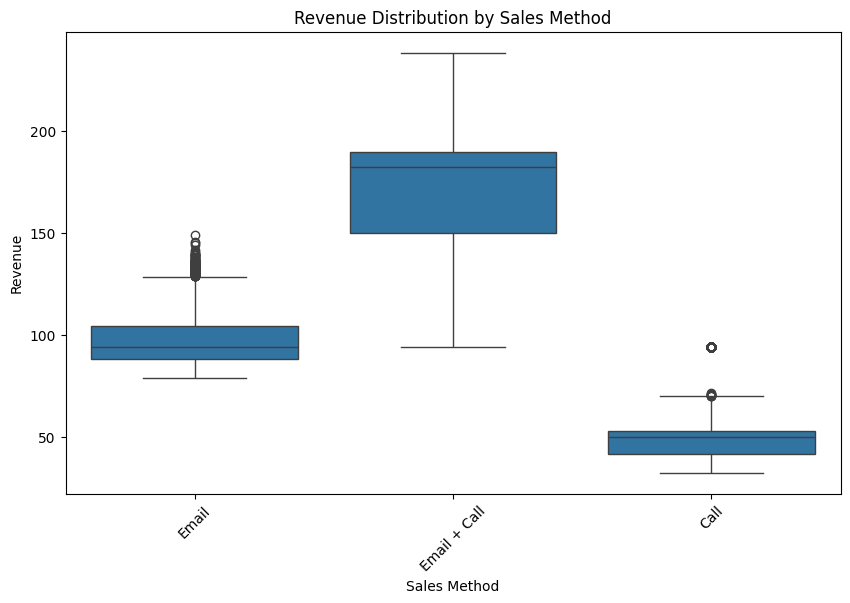

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='sales_method', y='revenue', data=sales)


plt.title('Revenue Distribution by Sales Method')
plt.ylabel('Revenue')
plt.xlabel('Sales Method')
plt.xticks(rotation=45)
plt.show()

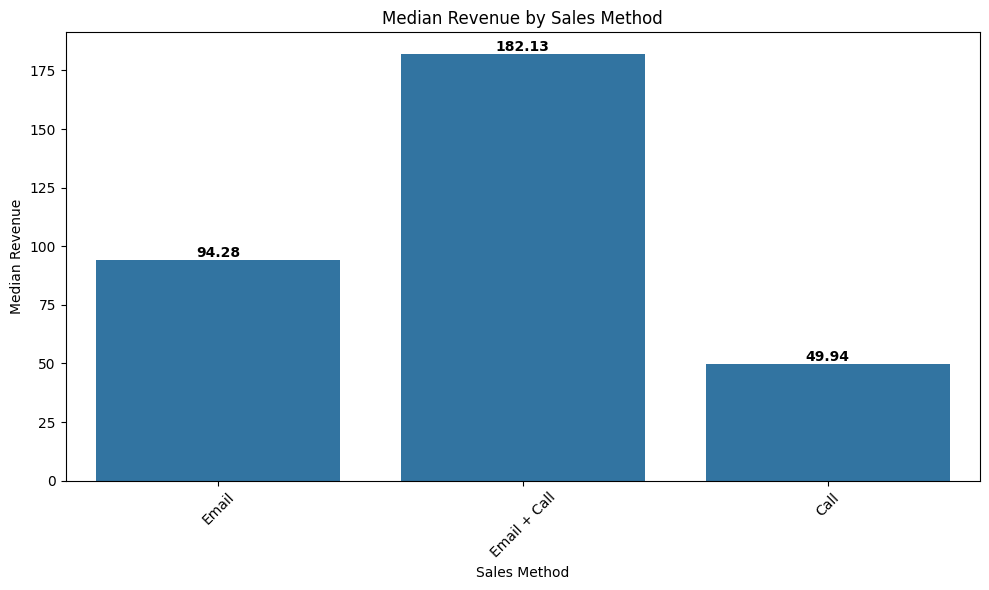

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='sales_method', y='revenue', data=sales, estimator=np.median,
                 errorbar=None)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.title('Median Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Median Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()